In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

In [2]:
# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

# 1. Image loading and visualization

In [3]:
im_custom = io.imread('im_custom.jpg')

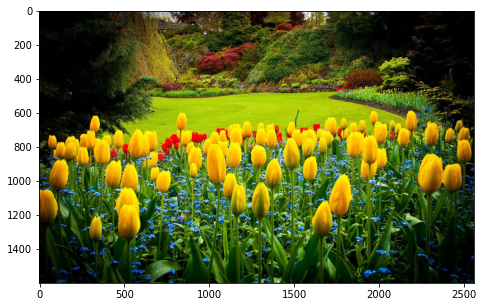

In [4]:
plt.imshow(im_custom); plt.show()

In [5]:
#we note that there is no optional fourth dimension
im_custom.shape

(1600, 2560, 3)

# 2. Convert into YCbCr color space

In [6]:
im_copia = im_custom.copy()

In [7]:
im_YCbCr = color.rgb2ycbcr(im_copia)

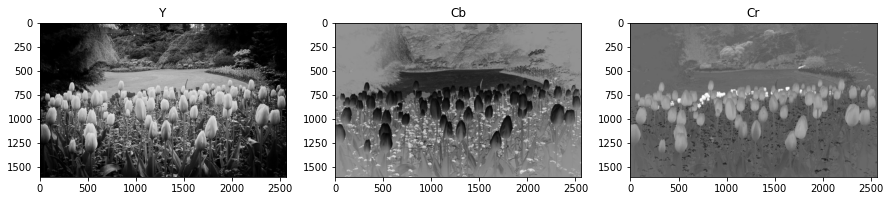

In [8]:
# Independent visualization of Y,Cb,Cr channels
plt.subplot(1,3,1); plt.imshow(im_YCbCr[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2); plt.imshow(im_YCbCr[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(im_YCbCr[:,:,2], cmap='gray'); plt.title('Cr')
plt.show()

#The Y channel captures image details 
#The Cb channel has high values for the blue hue and low values for the yellow hue, as it is easy to see from the picture. 
#The Cr channel has high values for the red hue and low values for the green hue. 

# 3. Blur Cb and Cr channels using a wide gaussian filter

In [9]:
#Blur Cb channel
im_YCbCr[:,:,1] = filters.gaussian(im_YCbCr[:,:,1], sigma = 50, preserve_range = True)

In [10]:
#Blur Cr channel
im_YCbCr[:,:,2] = filters.gaussian(im_YCbCr[:,:,2], sigma = 50, preserve_range = True)

In [11]:
#I considered a high sigma value; I will try other lower values later.

# 4. Visualize each channel of the YCbCr, and the rebuilt resulting RGB image

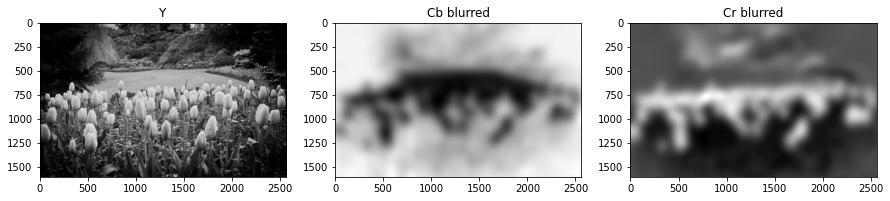

In [12]:
# Independent visualization of Y,Cb blurred,Cr blurred channels
plt.subplot(1,3,1); plt.imshow(im_YCbCr[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2); plt.imshow(im_YCbCr[:,:,1], cmap='gray'); plt.title('Cb blurred')
plt.subplot(1,3,3); plt.imshow(im_YCbCr[:,:,2], cmap='gray'); plt.title('Cr blurred')
plt.show()
#It can be seen that for sigma = 20, the last two channels are very blurred. 

In [13]:
#rebult RGB image
im_rgb = color.ycbcr2rgb(im_YCbCr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


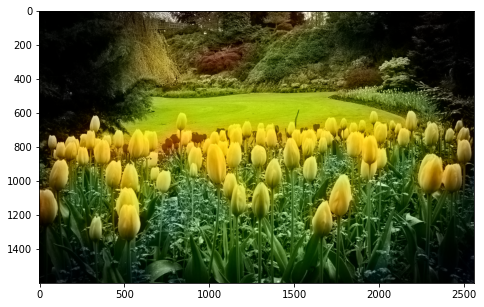

In [14]:
plt.imshow(im_rgb); plt.show()
#The photo has less quality but retains detail well. 

# 5. Blur only the Y channel (and keep the original Cb and Cr)

In [15]:
im_YCbCr = color.rgb2ycbcr(im_copia)

In [16]:
#Blur only the Y channel
im_YCbCr[:,:,0] = filters.gaussian(im_YCbCr[:,:,1], sigma = 50, preserve_range = True)

# 6. Visualize each channel of the YCbCr, and the rebuilt resulting RGB image

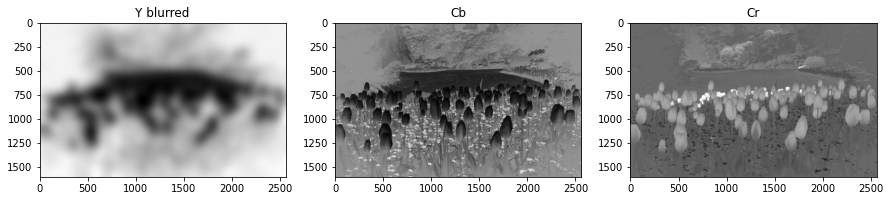

In [17]:
# Independent visualization of Y blurred, Cb, Cr channels
plt.subplot(1,3,1); plt.imshow(im_YCbCr[:,:,0], cmap='gray'); plt.title('Y blurred')
plt.subplot(1,3,2); plt.imshow(im_YCbCr[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(im_YCbCr[:,:,2], cmap='gray'); plt.title('Cr')
plt.show()

In [18]:
#rebult RGB image
im_rgb = color.ycbcr2rgb(im_YCbCr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


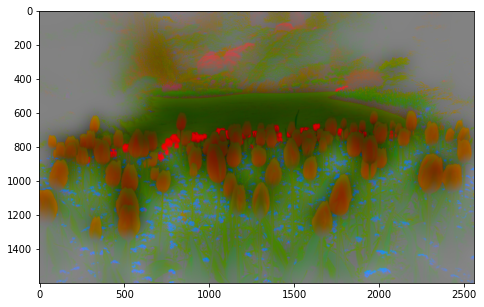

In [19]:
plt.imshow(im_rgb); plt.show()
#Applying the Gaussian filter to the Y channel results in the figure being compromised, both in detail and color. 

#7.  I try to do the same steps for sigma = 20 and 0.8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


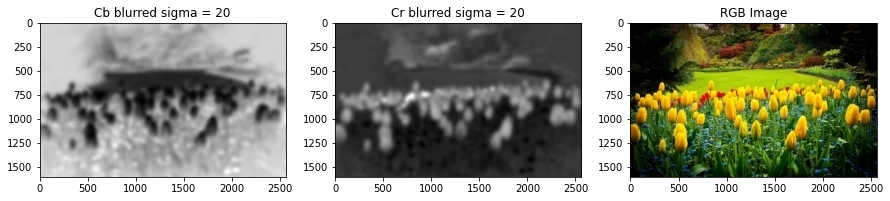

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


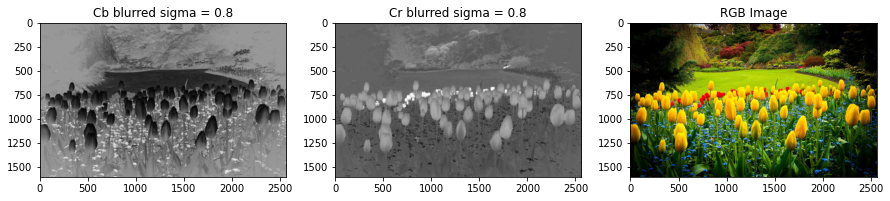

In [22]:
sigma = [20, 0.8]
for el in sigma:
  im_YCbCr = color.rgb2ycbcr(im_copia)
  im_YCbCr[:,:,1] = filters.gaussian(im_YCbCr[:,:,1], sigma = el, preserve_range = True)
  im_YCbCr[:,:,2] = filters.gaussian(im_YCbCr[:,:,2], sigma = el, preserve_range = True)
  im_rgb = color.ycbcr2rgb(im_YCbCr)
  plt.subplot(1,3,1); plt.imshow(im_YCbCr[:,:,1], cmap='gray'); plt.title('Cb blurred sigma = '+str(el))
  plt.subplot(1,3,2); plt.imshow(im_YCbCr[:,:,2], cmap='gray'); plt.title('Cr blurred sigma = '+str(el))
  plt.subplot(1,3,3); plt.imshow(im_rgb); plt.title('RGB Image')
  plt.show()

It is evident that using very high sigma values tends to distort the image by distorting the distribution of the pixel value inside the image, while using smaller values contributes to an improvement of the details.

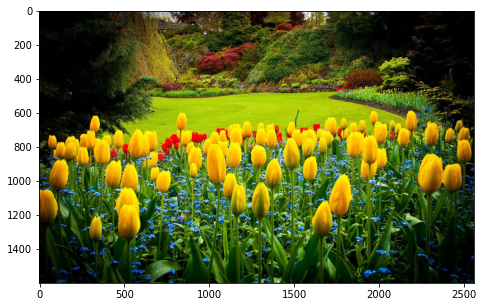

In [21]:
plt.imshow(im_custom); plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


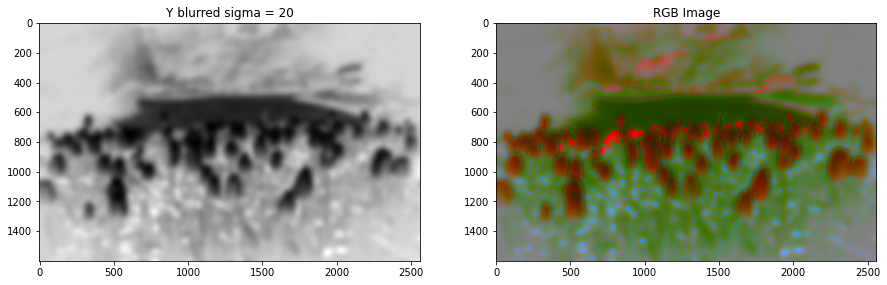

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


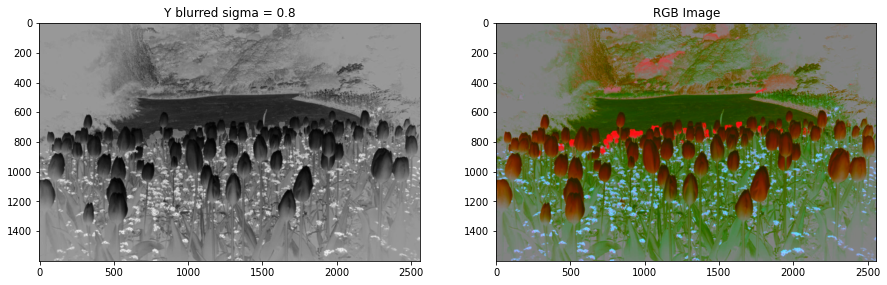

In [23]:
for el in sigma:
  im_YCbCr = color.rgb2ycbcr(im_copia)
  im_YCbCr[:,:,0] = filters.gaussian(im_YCbCr[:,:,1], sigma = el, preserve_range = True)
  im_rgb = color.ycbcr2rgb(im_YCbCr)
  plt.subplot(1,2,1); plt.imshow(im_YCbCr[:,:,0], cmap='gray'); plt.title('Y blurred sigma = '+str(el))
  plt.subplot(1,2,2); plt.imshow(im_rgb); plt.title('RGB Image')
  plt.show()

If the Gaussian filter is applied to the Y channel, the final figure will be distorted in terms of color. In this case the sigma value seems to affect only the details